In [37]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [38]:
dataset = pd.read_csv("CarPrice.csv")
dataset.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 177 to 102
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            143 non-null    int64  
 1   symboling         143 non-null    int64  
 2   CarName           143 non-null    object 
 3   fueltype          143 non-null    object 
 4   aspiration        143 non-null    object 
 5   doornumber        143 non-null    object 
 6   carbody           143 non-null    object 
 7   drivewheel        143 non-null    object 
 8   enginelocation    143 non-null    object 
 9   wheelbase         143 non-null    float64
 10  carlength         143 non-null    float64
 11  carwidth          143 non-null    float64
 12  carheight         143 non-null    float64
 13  curbweight        143 non-null    int64  
 14  enginetype        143 non-null    object 
 15  cylindernumber    143 non-null    object 
 16  enginesize        143 non-null    int64  


Exploratory Data Analysis-
Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

Index-
The first column is the index for each data point and hence we can simply remove it.

In [41]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

Name-

Let's explore the various cars in the dataset.


In [42]:
X_train["CarName"].value_counts()

peugeot 504                     5
toyota corona                   4
toyota corolla                  3
subaru dl                       3
subaru                          2
                               ..
volkswagen 1131 deluxe sedan    1
volkswagen model 111            1
alfa-romero giulia              1
toyota tercel                   1
nissan fuga                     1
Name: CarName, Length: 110, dtype: int64

In [43]:
make_train = X_train["CarName"].str.split(" ", expand = True)
make_test = X_test["CarName"].str.split(" ", expand = True)

In [44]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

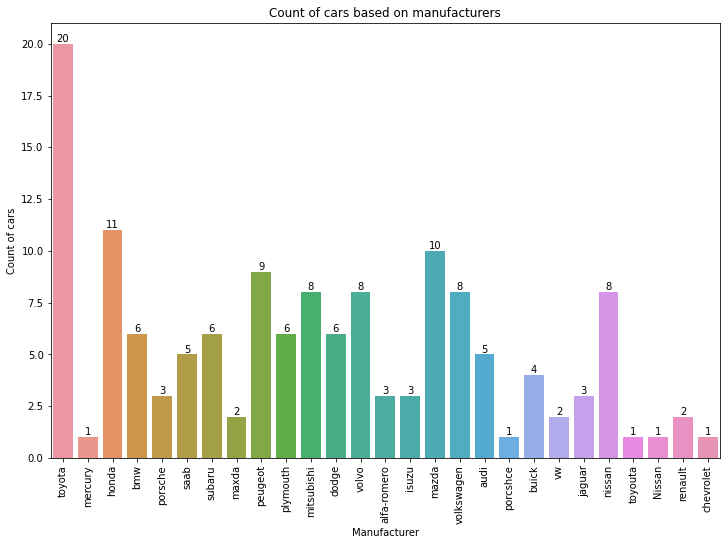

In [45]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer Maruti and there are no null values.

I'll also drop the CarName column.


In [46]:
X_train.drop("CarName", axis = 1, inplace = True)
X_test.drop("CarName", axis = 1, inplace = True)

engine size, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg

enginesize is a numerical column with a certain range of values.

In [47]:
X_train["enginesize"]

177    122
75     140
174    110
31      92
12     164
      ... 
106    181
14     164
92      97
179    171
102    181
Name: enginesize, Length: 143, dtype: int64

In [48]:
X_train["boreratio"]

177    3.31
75     3.78
174    3.27
31     2.91
12     3.31
       ... 
106    3.43
14     3.31
92     3.15
179    3.27
102    3.43
Name: boreratio, Length: 143, dtype: float64

In [49]:
X_train["stroke"]

177    3.54
75     3.12
174    3.35
31     3.41
12     3.19
       ... 
106    3.27
14     3.19
92     3.29
179    3.35
102    3.27
Name: stroke, Length: 143, dtype: float64

In [50]:
X_train["compressionratio"]

177     8.7
75      8.0
174    22.5
31      9.2
12      9.0
       ... 
106     9.0
14      9.0
92      9.4
179     9.3
102     9.0
Name: compressionratio, Length: 143, dtype: float64

In [51]:
X_train["horsepower"]

177     92
75     175
174     73
31      76
12     121
      ... 
106    160
14     121
92      69
179    161
102    152
Name: horsepower, Length: 143, dtype: int64

In [52]:
X_train["peakrpm"]

177    4200
75     5000
174    4500
31     6000
12     4250
       ... 
106    5200
14     4250
92     5200
179    5200
102    5200
Name: peakrpm, Length: 143, dtype: int64

In [53]:
X_train["citympg"]

177    27
75     19
174    30
31     31
12     21
       ..
106    19
14     20
92     31
179    19
102    17
Name: citympg, Length: 143, dtype: int64

In [54]:
X_train["highwaympg"]

177    32
75     24
174    33
31     38
12     28
       ..
106    25
14     25
92     37
179    24
102    22
Name: highwaympg, Length: 143, dtype: int64

In [55]:
X_train["curbweight"]

177    2458
75     2910
174    2480
31     1819
12     2710
       ... 
106    3139
14     3055
92     1938
179    3016
102    3296
Name: curbweight, Length: 143, dtype: int64

In [56]:
X_train["wheelbase"]

177    102.4
75     102.7
174    102.4
31      86.6
12     101.2
       ...  
106     99.2
14     103.5
92      94.5
179    102.9
102    100.4
Name: wheelbase, Length: 143, dtype: float64

In [65]:
X_train.drop("aspiration", axis = 1, inplace = True)
X_test.drop("aspiration", axis = 1, inplace = True)

In [66]:
X_train.drop("doornumber", axis = 1, inplace = True)
X_test.drop("doornumber", axis = 1, inplace = True)

In [67]:
X_train.drop("carbody", axis = 1, inplace = True)
X_test.drop("carbody", axis = 1, inplace = True)

In [68]:
X_train.drop("drivewheel", axis = 1, inplace = True)
X_test.drop("drivewheel", axis = 1, inplace = True)

In [69]:
X_train.drop("enginelocation", axis = 1, inplace = True)
X_test.drop("enginelocation", axis = 1, inplace = True)

In [72]:
X_train.drop("enginetype", axis = 1, inplace = True)
X_test.drop("enginetype", axis = 1, inplace = True)

In [73]:
X_train.drop("cylindernumber", axis = 1, inplace = True)
X_test.drop("cylindernumber", axis = 1, inplace = True)

In [74]:
X_train.drop("fuelsystem", axis = 1, inplace = True)
X_test.drop("fuelsystem", axis = 1, inplace = True)

In [ ]:
X_train.drop("", axis = 1, inplace = True)
X_test.drop("", axis = 1, inplace = True)

In [ ]:
X_train.drop("", axis = 1, inplace = True)
X_test.drop("", axis = 1, inplace = True)

Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [57]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer","enginesize", "boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg"],
                         drop_first = True)

In [58]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer","enginesize", "boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.


In [75]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [76]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

Training and predicting

I'll create a Linear Regression model and a Random Forest model to train on the data and use it for future predictions.

In [77]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-7.512020990152097e+25

In [78]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8163783518534432